# PYTHON IMPLEMENTATION

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)


The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

In [4]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

there is no null value in the data set so we are good to go

In [5]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
data["Workclass"]=le.fit_transform(data["Workclass"])
data["Education"]=le.fit_transform(data["Education"])
data["Marital_status"]=le.fit_transform(data["Marital_status"])
data["Occupation"]=le.fit_transform(data["Occupation"])
data["Relationship"]=le.fit_transform(data["Relationship"])
data["Race"]=le.fit_transform(data["Race"])
data["Sex"]=le.fit_transform(data["Sex"])
data["Native_country"]=le.fit_transform(data["Native_country"])
data["Income"]=le.fit_transform(data["Income"])

In [8]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


# checking correlation

In [9]:
data.corr()
corr_mat=data.corr()

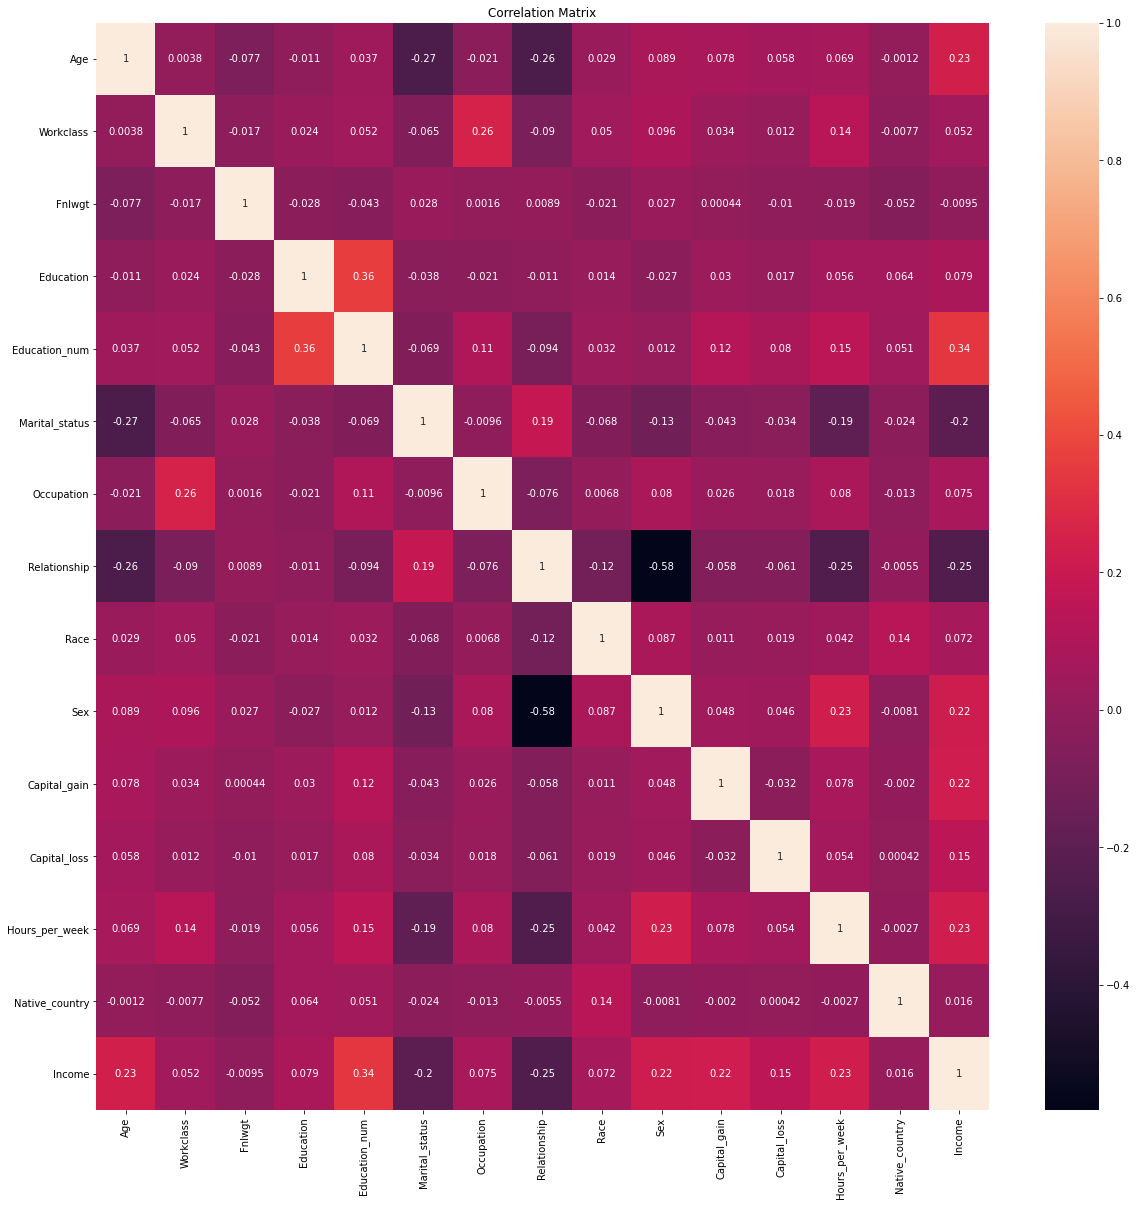

In [10]:
#size of the canvas
plt.figure(figsize=([20,20]))

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [11]:
corr_mat["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

we can identify the correlation among all the columns using above heatmap

now we can clearly identify the correlation of independent variable with target variable

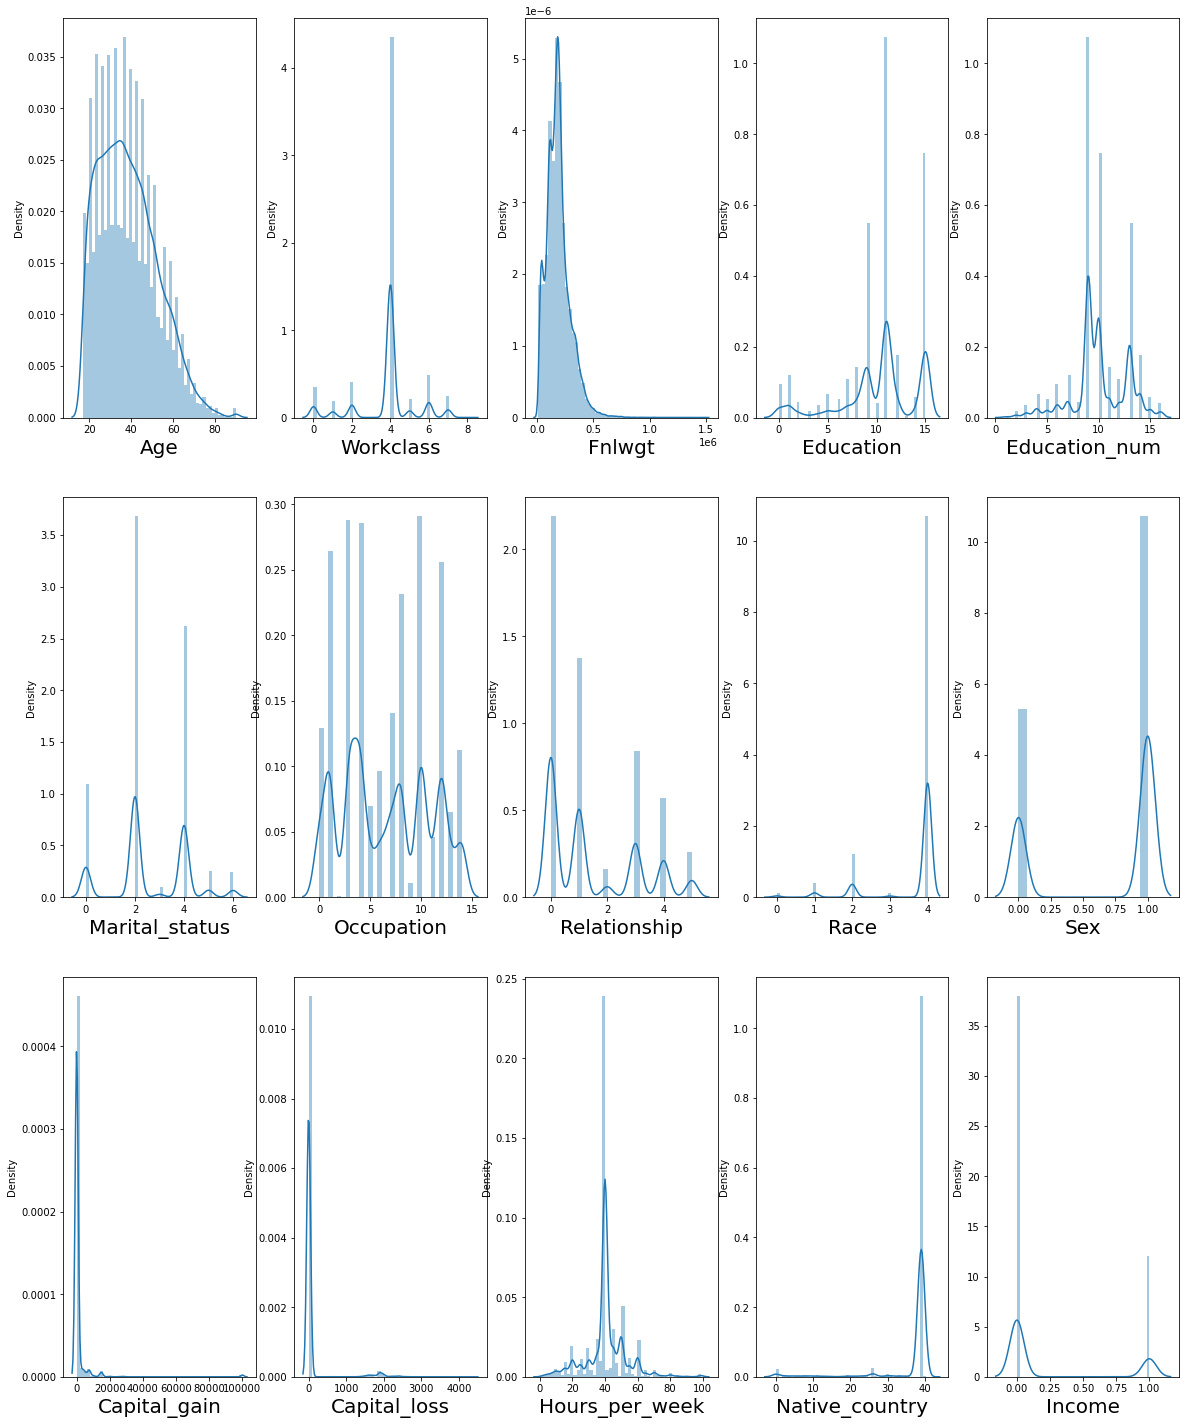

In [12]:
#let's see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()
        

data is looking skewed let proceed further to remove skewness using power_transform

first split the data into target and independent variable

In [13]:
#spliting data into independent and dependent variable
x=data.drop(['Income'],axis=1)
y=data["Income"]

In [14]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [16]:
#check skewness
x.skew().sort_values()

Native_country    -3.658235
Race              -2.435332
Education         -0.934063
Workclass         -0.752280
Sex               -0.719244
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Hours_per_week     0.227636
Age                0.558738
Relationship       0.786784
Fnlwgt             1.446972
Capital_loss       4.594549
Capital_gain      11.953690
dtype: float64

few columns are highly skewed lets handle them using power transform

In [17]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [18]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.891947,1.644223,-1.089889,-0.477012,1.164793,-0.383427,-0.502825,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-2.221515,0.329074
1,0.102717,0.011864,0.398743,0.090482,-0.464330,-1.782434,-0.013085,0.134511,0.412893,0.703087,-0.301370,-0.221213,-0.035570,0.329074
2,1.064381,0.011864,0.562540,-2.067600,-1.200274,-0.383427,-0.013085,-1.094635,-2.431920,0.703087,-0.301370,-0.221213,-0.035570,0.329074
3,-0.731663,0.011864,1.340398,-0.477012,1.164793,-0.383427,0.829763,1.549018,-2.431920,-1.422298,-0.301370,-0.221213,-0.035570,-3.224844
4,0.028023,0.011864,0.957182,0.395133,1.600809,-0.383427,-0.502825,1.549018,0.412893,-1.422298,-0.301370,-0.221213,-0.035570,0.329074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.011864,0.746749,-0.984718,0.739697,-0.383427,1.386870,1.549018,0.412893,-1.422298,-0.301370,-0.221213,-0.197550,0.329074
32556,0.247374,0.011864,-0.193298,0.090482,-0.464330,-0.383427,0.211660,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-0.035570,0.329074
32557,1.334556,0.011864,-0.219755,0.090482,-0.464330,2.171784,-1.415274,1.351388,0.412893,-1.422298,-0.301370,-0.221213,-0.035570,0.329074
32558,-1.358341,0.011864,0.271668,0.090482,-0.464330,0.919719,-1.415274,1.091081,0.412893,0.703087,-0.301370,-0.221213,-1.654992,0.329074


In [19]:
#validating that skewness has been removed or not
x.skew().sort_values()

Native_country   -2.725467
Race             -2.010817
Sex              -0.719244
Education        -0.309431
Occupation       -0.187152
Marital_status   -0.114201
Age              -0.013897
Fnlwgt            0.016914
Education_num     0.023885
Workclass         0.061629
Relationship      0.122917
Hours_per_week    0.229556
Capital_gain      3.016951
Capital_loss      4.299511
dtype: float64

now skeweed columns are categorical so we can proceed

# check outliers

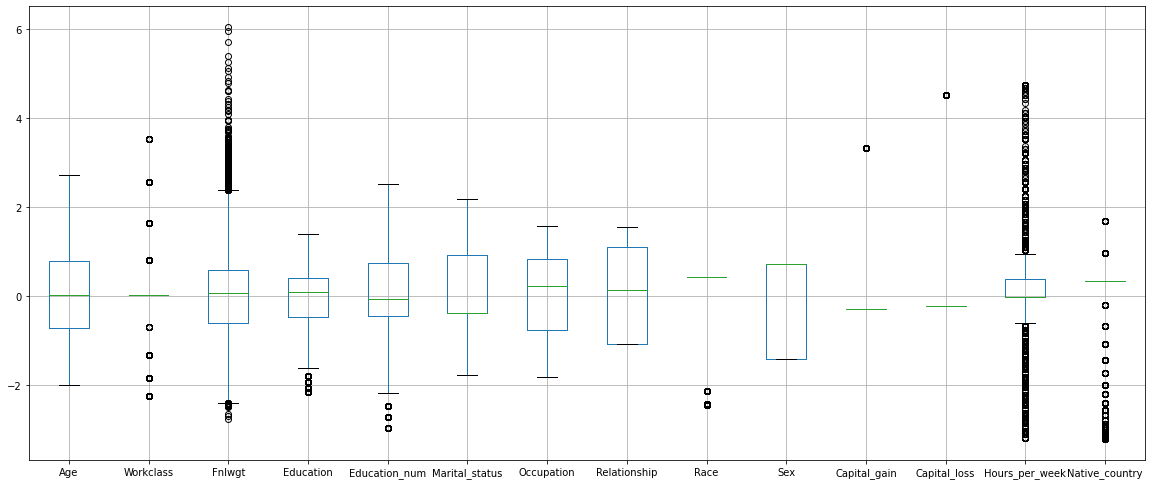

In [20]:
#plotting boxplot for columns
x.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

columns having lot of outliers so lets handle them

In [21]:
#find the IQR (inter quantile range) to identify outliers

#1St quantile
q1=data.quantile(0.25)

#3rd quantile
q3=data.quantile(0.75)

#IOR
iqr=q3-q1

In [22]:
q1


Age                   28.0
Workclass              4.0
Fnlwgt            117831.5
Education              9.0
Education_num          9.0
Marital_status         2.0
Occupation             3.0
Relationship           0.0
Race                   4.0
Sex                    0.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week        40.0
Native_country        39.0
Income                 0.0
Name: 0.25, dtype: float64

In [23]:
q3

Age                   48.0
Workclass              4.0
Fnlwgt            237054.5
Education             12.0
Education_num         12.0
Marital_status         4.0
Occupation            10.0
Relationship           3.0
Race                   4.0
Sex                    1.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week        45.0
Native_country        39.0
Income                 0.0
Name: 0.75, dtype: float64

In [24]:
iqr

Age                   20.0
Workclass              0.0
Fnlwgt            119223.0
Education              3.0
Education_num          3.0
Marital_status         2.0
Occupation             7.0
Relationship           3.0
Race                   0.0
Sex                    1.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week         5.0
Native_country         0.0
Income                 0.0
dtype: float64

# OUTLIER DETECTION FORMULA

# higher side ==> Q3+(1.5*IQR)

# lower side ==> Q3-(1.5*IQR)

In [25]:
#validating one outlier

Workclass_high=(q3.Workclass+(1.5*iqr.Workclass))
Workclass_high

index=np.where(data['Workclass']>Workclass_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
2,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
3,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
4,5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27587,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
27588,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
27589,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
27590,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [26]:
Workclass_low=(q3.Workclass-(1.5*iqr.Workclass))
Workclass_low

index=np.where(data['Workclass']<Workclass_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
2,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
3,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
4,5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22691,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
22692,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
22693,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
22694,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [27]:
Hours_per_week_high=(q3.Hours_per_week+(1.5*iqr.Hours_per_week))
Hours_per_week_high

index=np.where(data['Hours_per_week']>Hours_per_week_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
2,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
3,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
4,5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20652,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
20653,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
20654,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
20655,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [28]:
Hours_per_week_low=(q3.Hours_per_week-(1.5*iqr.Hours_per_week))
Hours_per_week_low

index=np.where(data['Hours_per_week']<Hours_per_week_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
2,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
3,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
4,7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15831,32553,53,4,321865,12,14,2,4,0,4,1,0,0,40,39,1
15832,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
15833,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
15834,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1


In [29]:
Education_low=(q3.Education-(1.5*iqr.Education))
Education_low

index=np.where(data['Education']<Education_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
2,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
3,7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
4,8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13365,32551,43,4,84661,8,11,2,12,0,4,1,0,0,45,39,0
13366,32553,53,4,321865,12,14,2,4,0,4,1,0,0,40,39,1
13367,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
13368,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1


In [30]:
Fnlwgt_high=(q3.Fnlwgt+(1.5*iqr.Fnlwgt))
Fnlwgt_high

index=np.where(data['Fnlwgt']>Fnlwgt_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
2,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
3,7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
4,8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959,32551,43,4,84661,8,11,2,12,0,4,1,0,0,45,39,0
12960,32553,53,4,321865,12,14,2,4,0,4,1,0,0,40,39,1
12961,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
12962,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1


In [31]:
Fnlwgt_low=(q3.Fnlwgt-(1.5*iqr.Fnlwgt))
Fnlwgt_low

index=np.where(data['Fnlwgt']<Fnlwgt_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
2,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
3,8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
4,13,40,4,121772,8,11,2,3,0,1,1,0,0,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,32551,43,4,84661,8,11,2,12,0,4,1,0,0,45,39,0
11951,32553,53,4,321865,12,14,2,4,0,4,1,0,0,40,39,1
11952,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
11953,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1


In [32]:
Native_country_low=(q3.Native_country-(1.5*iqr.Native_country))
Native_country_low

index=np.where(data['Native_country']<Native_country_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
2,8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
3,16,32,4,186824,11,9,4,7,4,4,1,0,0,40,39,0
4,23,59,4,109015,11,9,0,13,4,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,32551,43,4,84661,8,11,2,12,0,4,1,0,0,45,39,0
10819,32553,53,4,321865,12,14,2,4,0,4,1,0,0,40,39,1
10820,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
10821,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1


now we have delt with most of the outliers so we are good to go

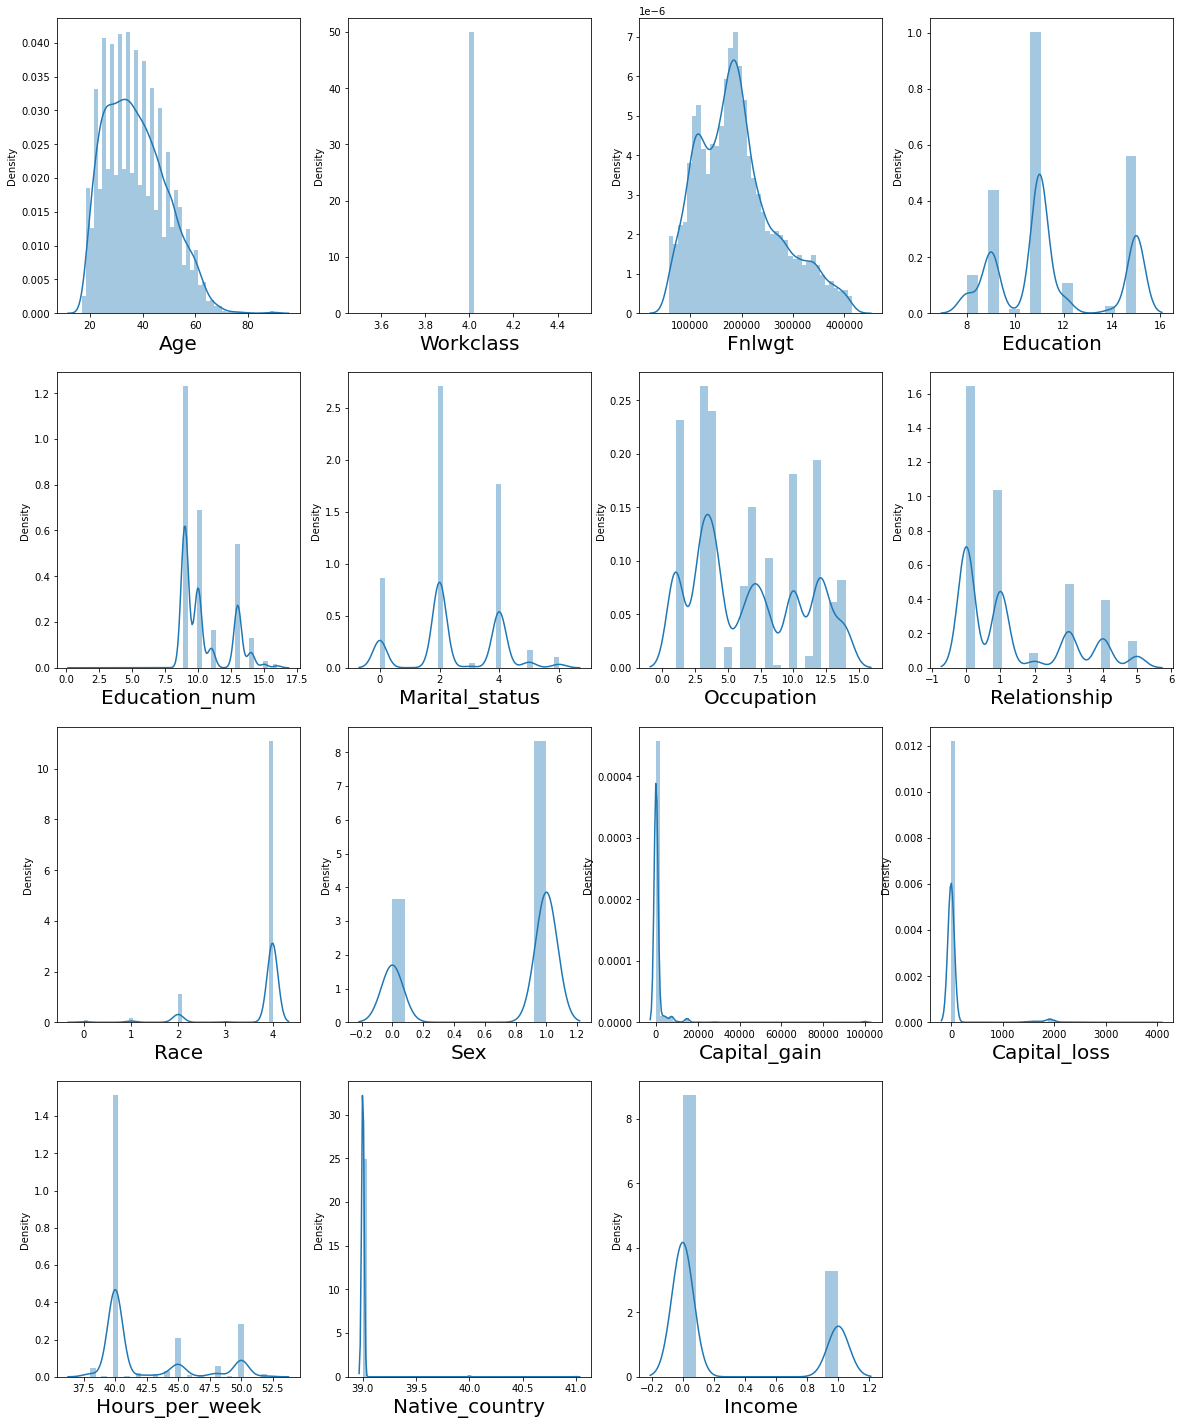

In [33]:
#lets plot the data now
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

now data is much better than before so lets proceed

before we fit our data to a model . let's visualize the relationship between our independent variables and the categories

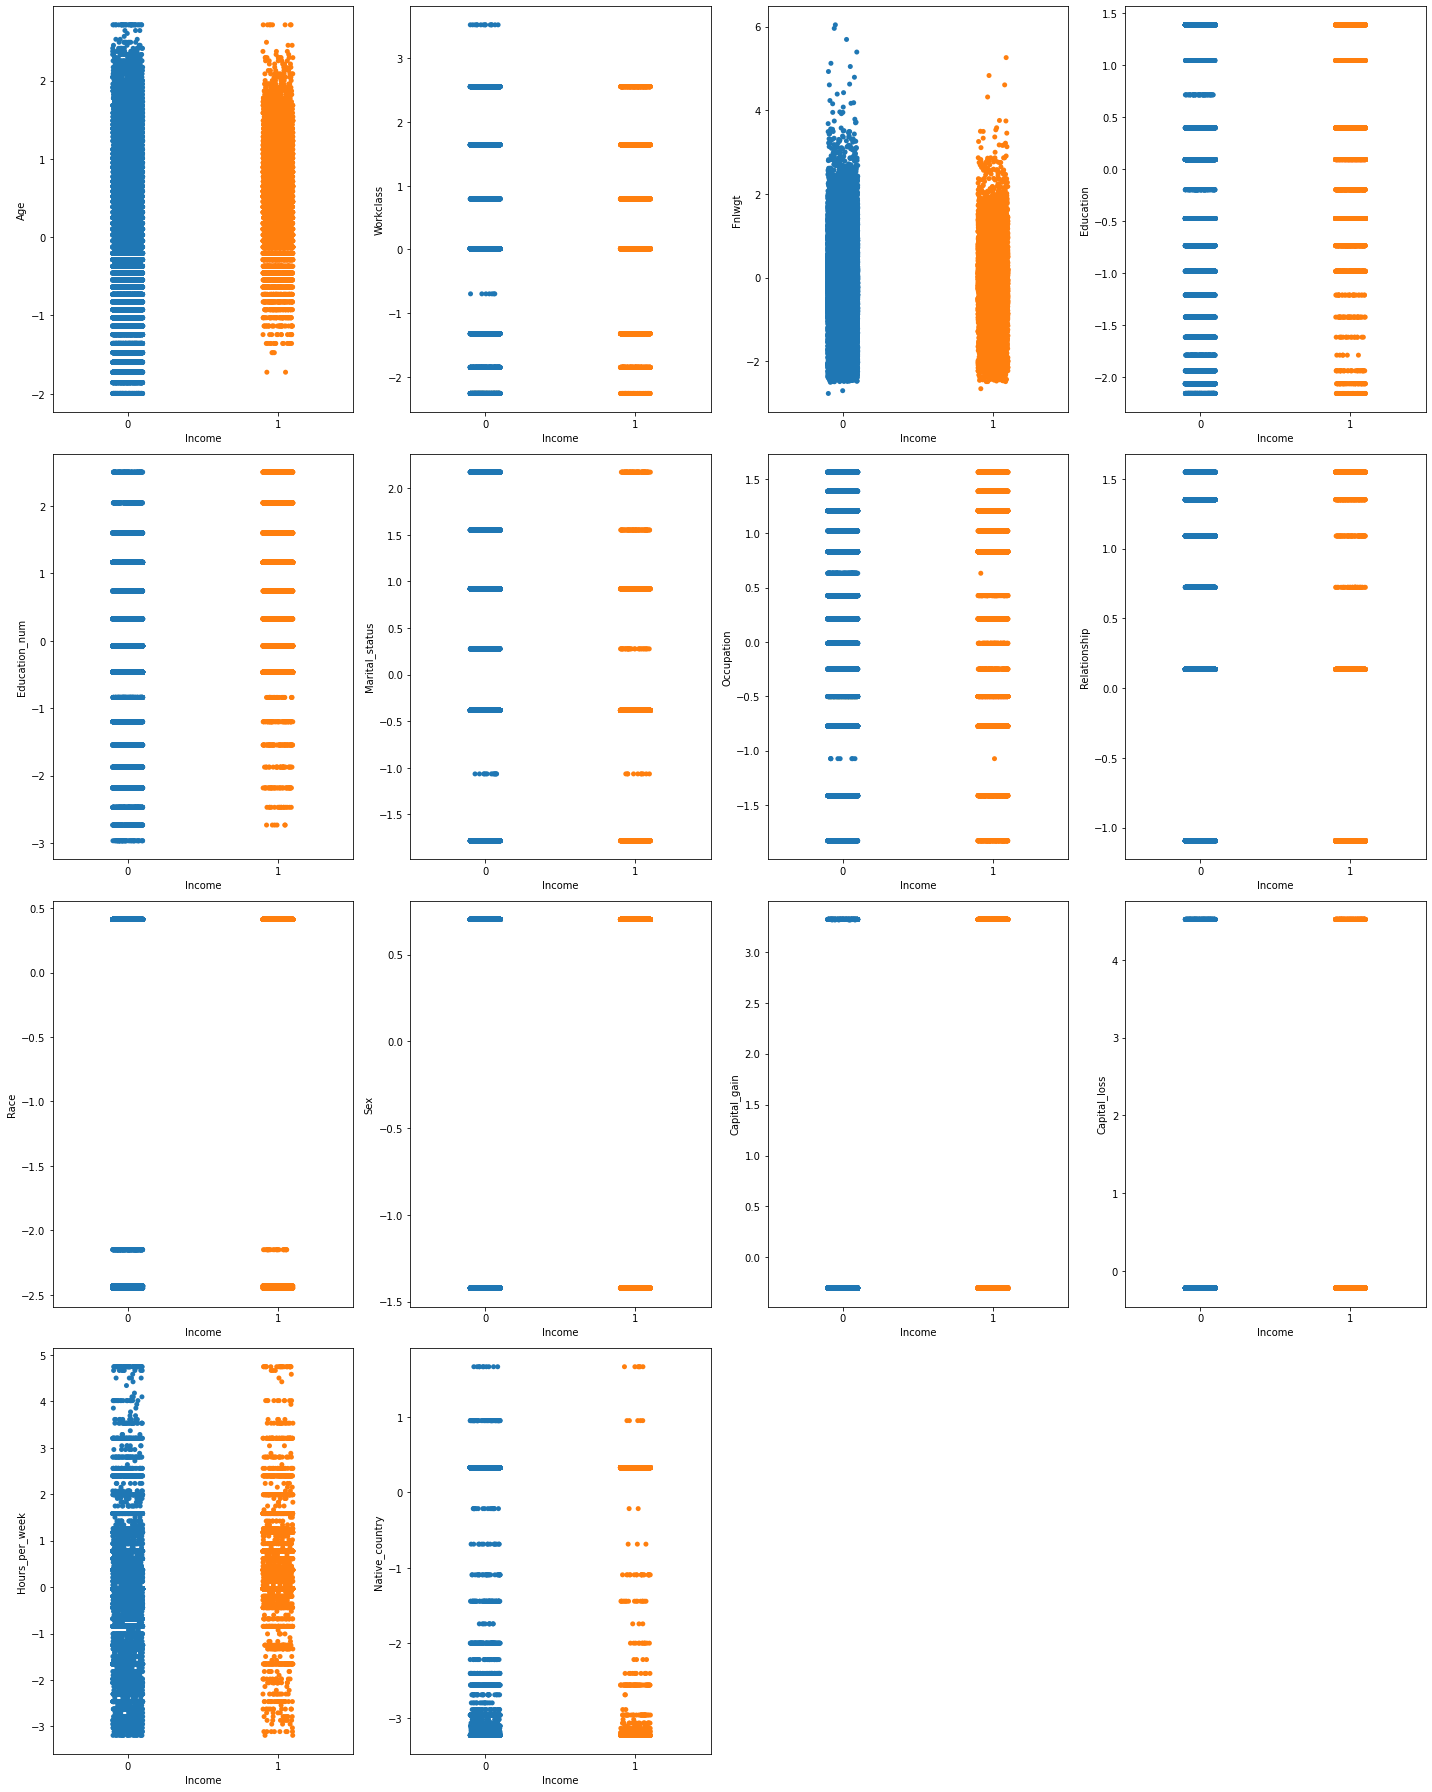

In [34]:
#let's see how features are related to class
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


greta let's proceed by checking multicollinearity in the dependent variables. before that we should scale our data. let's use standard scalar for that

# Data Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [36]:
x_scaled

array([[ 0.89194656,  1.64422286, -1.08988899, ..., -0.2212132 ,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ..., -0.2212132 ,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -0.2212132 ,
        -0.03557001,  0.32907402]])

finding variance inflation factor in each scaled column i.e. x_scaled1

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.264977,Age
1,1.092684,Workclass
2,1.016028,Fnlwgt
3,1.093973,Education
4,1.155662,Education_num
5,1.168539,Marital_status
6,1.098741,Occupation
7,1.933979,Relationship
8,1.054044,Race
9,1.651614,Sex


all the vif values are less than 5 and are very low. that means no multicollinearity. now, we can go ahead with fitting our data to the model. before that let's split our data in test and training set

# Training Process

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [39]:
#find best random state for train_test_split
maxAccu=0       #maximum accuracy
maxRS=0         #best random state

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on random_state",maxRS)

Best Accuracy is 0.8352579852579852 on random_state 83


# creating train test split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=83)

In [41]:
x_train

array([[ 0.2473743 ,  0.01186427, -2.08785907, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [-0.28844236, -1.85092453, -2.24682424, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 0.77216325,  0.01186427,  0.33056733, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       ...,
       [ 0.02802286,  0.01186427, -0.96504594, ..., -0.2212132 ,
         1.58456436,  0.32907402],
       [ 1.77550384,  0.01186427, -0.54603487, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 0.3174779 , -1.32188022, -2.38396048, ..., -0.2212132 ,
         1.58456436,  0.32907402]])

In [42]:
x_test

array([[ 0.02802286,  0.01186427,  0.41798221, ..., -0.2212132 ,
        -0.03557001, -2.95493163],
       [ 1.28211241, -1.32188022, -0.71484396, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 0.10271741,  0.01186427,  0.94750927, ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       ...,
       [-0.45865555,  0.01186427,  1.2879049 , ..., -0.2212132 ,
        -0.03557001,  0.32907402],
       [ 0.2473743 , -1.32188022,  0.22317043, ..., -0.2212132 ,
        -0.03557001, -2.00074112],
       [ 0.64817339,  0.01186427,  0.14718893, ..., -0.2212132 ,
        -0.03557001,  0.32907402]])

In [43]:
y_train

75       0
18642    1
31691    0
9911     0
20223    1
        ..
27904    0
28455    0
13288    1
28183    0
2130     0
Name: Income, Length: 24420, dtype: int32

In [44]:
y_test

26266    0
4042     0
28316    0
9137     0
26556    0
        ..
16308    0
30845    0
16856    0
12934    0
7580     0
Name: Income, Length: 8140, dtype: int32

# Logistic Regression

In [45]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 83.52579852579852
[[5842  371]
 [ 970  957]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6213
           1       0.72      0.50      0.59      1927

    accuracy                           0.84      8140
   macro avg       0.79      0.72      0.74      8140
weighted avg       0.83      0.84      0.82      8140



# Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.3931203931204
[[5382  831]
 [ 765 1162]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6213
           1       0.58      0.60      0.59      1927

    accuracy                           0.80      8140
   macro avg       0.73      0.73      0.73      8140
weighted avg       0.81      0.80      0.81      8140



# RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 85.29484029484028
[[5783  430]
 [ 767 1160]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6213
           1       0.73      0.60      0.66      1927

    accuracy                           0.85      8140
   macro avg       0.81      0.77      0.78      8140
weighted avg       0.85      0.85      0.85      8140



# SVC(Support Vector Classifier)

In [48]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 80.3931203931204
[[5382  831]
 [ 765 1162]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6213
           1       0.58      0.60      0.59      1927

    accuracy                           0.80      8140
   macro avg       0.73      0.73      0.73      8140
weighted avg       0.81      0.80      0.81      8140



LogisticRegression ,RandomForestClassifier,SVC are producing good accuracy. now we will check cross validation score as well for overfitting

In [50]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x_scaled,y,cv=5)
print("Cross Validation Score of LogisticRegression :",scr.mean()*100)

Cross Validation Score of LogisticRegression : 82.4723587223587


In [51]:
scr2=cross_val_score(svc,x_scaled,y,cv=5)
print("Cross Validation Score ofSVC Model :",scr2.mean()*100)

Cross Validation Score ofSVC Model : 83.57186732186733


In [52]:
scr3=cross_val_score(rf,x_scaled,y,cv=5)
print("Cross Validation Score of Random Forest Model :",scr3.mean()*100)

Cross Validation Score of Random Forest Model : 85.07985257985257


Random Forest Classifier is performing better among all so we will continue with Random Forest Classifier

# Hyper Parameter Tunning

In [53]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [54]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")

In [55]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [56]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)*100

85.44226044226045

# ROC AUC PLOT

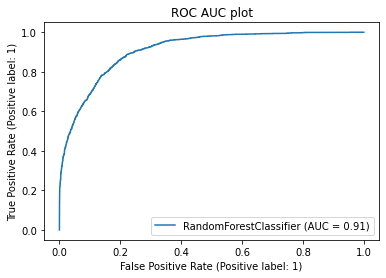

In [58]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

final accuracy is 85% and AUC score is 91% which is pretty good